In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

In [3]:
train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/wildanimals/train', target_size=(224,224))

Found 398 images belonging to 4 classes.


In [4]:
val_data = val_datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/wildanimals/val', target_size=(224,224))

Found 80 images belonging to 4 classes.


In [5]:
train_data[0][0].shape

(32, 224, 224, 3)

In [6]:
def model(model_name):
  model = Sequential()
  for layer in model_name.layers:
    layer.trainable = False
    model.add(layer)
  return model

In [7]:
vgg16 = VGG16(include_top=False,input_shape=(224,224, 3))
model_vgg16 = model(vgg16)
model_vgg16.add(Flatten())
model_vgg16.add(Dense(4096, activation='relu'))
model_vgg16.add(Dense(4096, activation='relu'))
model_vgg16.add(Dense(4, activation='softmax'))
model_vgg16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [8]:
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
results_vgg16 = model_vgg16.fit(
    x=train_data,
    batch_size=32,
    epochs=5,
    validation_data = val_data,
    verbose=2,
)

Epoch 1/5
13/13 - 27s - loss: 112.0205 - accuracy: 0.5578 - val_loss: 8.1503 - val_accuracy: 0.7625
Epoch 2/5
13/13 - 4s - loss: 1.0009 - accuracy: 0.8894 - val_loss: 1.1940 - val_accuracy: 0.9625
Epoch 3/5
13/13 - 4s - loss: 0.4269 - accuracy: 0.8970 - val_loss: 0.7427 - val_accuracy: 0.9875
Epoch 4/5
13/13 - 4s - loss: 0.2196 - accuracy: 0.8995 - val_loss: 0.7151 - val_accuracy: 0.9750
Epoch 5/5
13/13 - 4s - loss: 0.2320 - accuracy: 0.8920 - val_loss: 1.2396 - val_accuracy: 0.9750


In [10]:
vgg19 = VGG19(include_top=False,input_shape=(224,224, 3))
model_vgg19 = model(vgg19)
model_vgg19.add(Flatten())
model_vgg19.add(Dense(4096, activation='relu'))
model_vgg19.add(Dense(4096, activation='relu'))
model_vgg19.add(Dense(4, activation='softmax'))
model_vgg19.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [11]:
model_vgg19.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
results_vgg19 = model_vgg19.fit(
    x=train_data,
    batch_size=32,
    epochs=5,
    validation_data = val_data,
    verbose=2,
)

Epoch 1/5
13/13 - 6s - loss: 132.8582 - accuracy: 0.5955 - val_loss: 2.5162 - val_accuracy: 0.9000
Epoch 2/5
13/13 - 5s - loss: 1.5703 - accuracy: 0.8593 - val_loss: 1.8195 - val_accuracy: 0.9375
Epoch 3/5
13/13 - 5s - loss: 0.6437 - accuracy: 0.8744 - val_loss: 0.3435 - val_accuracy: 0.9875
Epoch 4/5
13/13 - 5s - loss: 0.5510 - accuracy: 0.8945 - val_loss: 5.3282 - val_accuracy: 0.8375
Epoch 5/5
13/13 - 5s - loss: 0.4054 - accuracy: 0.8869 - val_loss: 1.6420 - val_accuracy: 0.9375


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

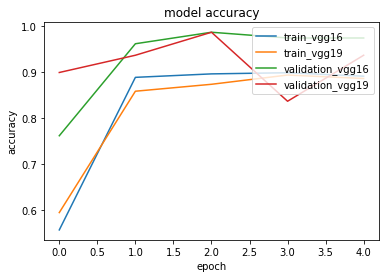

In [18]:
plt.plot(results_vgg16.history['accuracy'])
plt.plot(results_vgg19.history['accuracy'])
plt.plot(results_vgg16.history['val_accuracy'])
plt.plot(results_vgg19.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_vgg16', 'train_vgg19', 'validation_vgg16', 'validation_vgg19'], loc='upper right')

vgg16 looks better compared to vgg19 for this dataset by the numbers